In [448]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder,RobustScaler


In [449]:
df = pd.read_csv("Credit_card.csv")
df_label = pd.read_csv("Credit_card_label.csv")
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [450]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Display unique values for each feature
for column in categorical_columns:
    print(f"Possible values for {column}: {df[column].unique()}")

Possible values for GENDER: ['M' 'F' nan]
Possible values for Car_Owner: ['Y' 'N']
Possible values for Propert_Owner: ['Y' 'N']
Possible values for Type_Income: ['Pensioner' 'Commercial associate' 'Working' 'State servant']
Possible values for EDUCATION: ['Higher education' 'Secondary / secondary special' 'Lower secondary'
 'Incomplete higher' 'Academic degree']
Possible values for Marital_status: ['Married' 'Single / not married' 'Civil marriage' 'Separated' 'Widow']
Possible values for Housing_type: ['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Co-op apartment' 'Office apartment']
Possible values for Type_Occupation: [nan 'Core staff' 'Cooking staff' 'Laborers' 'Sales staff' 'Accountants'
 'High skill tech staff' 'Managers' 'Cleaning staff' 'Drivers'
 'Low-skill Laborers' 'IT staff' 'Waiters/barmen staff' 'Security staff'
 'Medicine staff' 'Private service staff' 'HR staff' 'Secretaries'
 'Realty agents']


In [451]:
df_label.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [452]:
merged_df = pd.merge(df, df_label, on="Ind_ID", how="inner")
merged_df.head()


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [453]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1541 entries, 0 to 1540
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1541 non-null   int64  
 1   GENDER           1535 non-null   object 
 2   Car_Owner        1541 non-null   object 
 3   Propert_Owner    1541 non-null   object 
 4   CHILDREN         1541 non-null   int64  
 5   Annual_income    1518 non-null   float64
 6   Type_Income      1541 non-null   object 
 7   EDUCATION        1541 non-null   object 
 8   Marital_status   1541 non-null   object 
 9   Housing_type     1541 non-null   object 
 10  Birthday_count   1519 non-null   float64
 11  Employed_days    1541 non-null   int64  
 12  Mobile_phone     1541 non-null   int64  
 13  Work_Phone       1541 non-null   int64  
 14  Phone            1541 non-null   int64  
 15  EMAIL_ID         1541 non-null   int64  
 16  Type_Occupation  1053 non-null   object 
 17  Family_Members

In [454]:
merged_df.isna().sum()

Ind_ID               0
GENDER               6
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

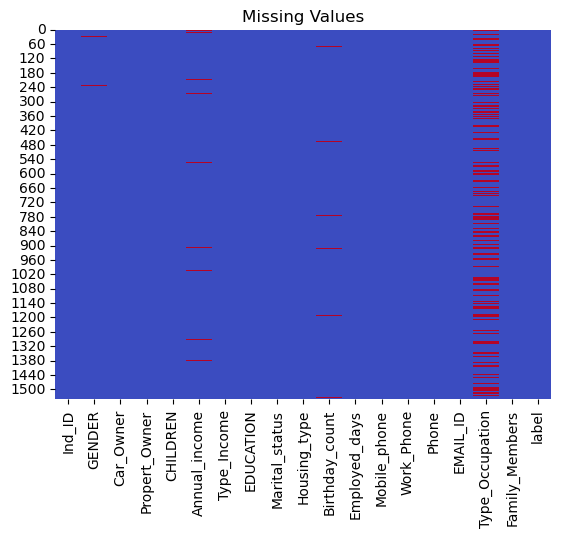

In [455]:
sns.heatmap(merged_df.isnull(), cmap='coolwarm', cbar=False)
plt.title('Missing Values')
plt.show()

In [456]:
merged_df.loc[(merged_df['Employed_days'] > 0) & (merged_df['Type_Occupation'].isna()), 'Type_Occupation'] = 'unemployed'

merged_df.head()


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,unemployed,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [457]:
merged_df.isnull().sum()

Ind_ID               0
GENDER               6
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Mobile_phone         0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    227
Family_Members       0
label                0
dtype: int64

In [458]:
merged_df['Annual_income'] = merged_df['Annual_income'].interpolate(method='linear', limit_direction='forward',axis=0)
merged_df['Birthday_count'] = merged_df['Birthday_count'].interpolate(method='linear', limit_direction='forward',axis=0)
merged_df['Type_Occupation'] = merged_df['Type_Occupation'].fillna(df['Type_Occupation'].mode()[0])
merged_df['GENDER'] = merged_df['GENDER'].fillna(df['GENDER'].mode()[0])
merged_df.isnull().sum()


Ind_ID             0
GENDER             0
Car_Owner          0
Propert_Owner      0
CHILDREN           0
Annual_income      0
Type_Income        0
EDUCATION          0
Marital_status     0
Housing_type       0
Birthday_count     0
Employed_days      0
Mobile_phone       0
Work_Phone         0
Phone              0
EMAIL_ID           0
Type_Occupation    0
Family_Members     0
label              0
dtype: int64

In [459]:
merged_df.label.value_counts()

label
0    1372
1     169
Name: count, dtype: int64

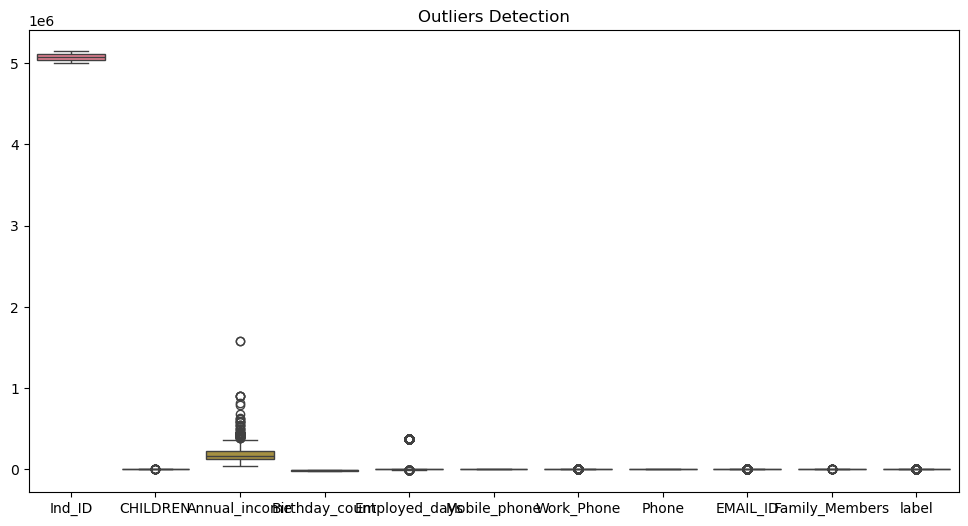

In [460]:
plt.figure(figsize=(12,6))
sns.boxplot(merged_df)
plt.title('Outliers Detection')
plt.show()

In [461]:
numeric_columns = merged_df.select_dtypes(include=['float64', 'int64']).columns
numeric_columns = numeric_columns.drop('label', errors='ignore')

# Calculate the IQR for each numeric column
Q1 = merged_df[numeric_columns].quantile(0.25)
Q3 = merged_df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

outliers = ((merged_df[numeric_columns] < (Q1 - 1.5 * IQR)) | (merged_df[numeric_columns] > (Q3 + 1.5 * IQR)))

# Remove rows with any outliers
merged_df = merged_df[~outliers.any(axis=1)]

# Verify that the outliers were removed
merged_df.label.value_counts()

label
0    676
1     74
Name: count, dtype: int64

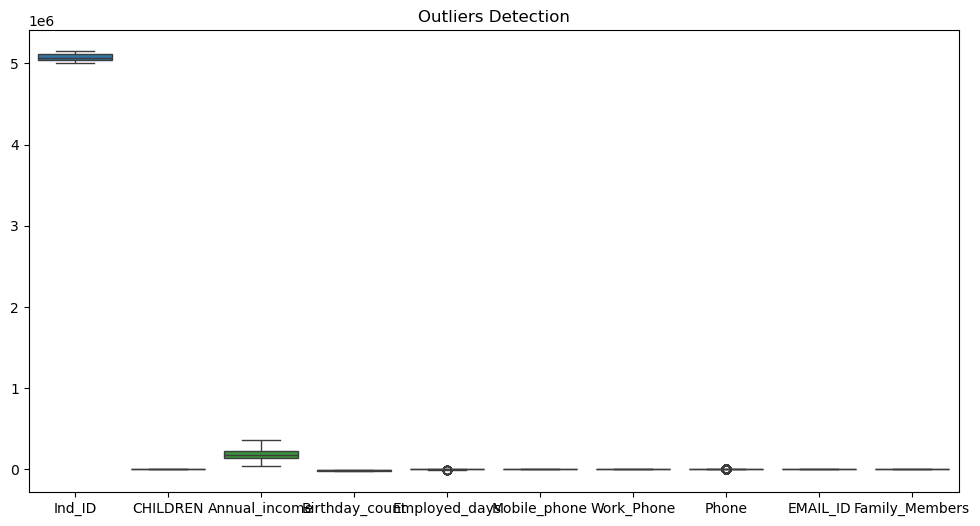

In [462]:
plt.figure(figsize=(12,6))
sns.boxplot(merged_df[numeric_columns])
plt.title('Outliers Detection')
plt.show()

In [463]:
X = merged_df.drop(['label','Ind_ID','Birthday_count'], axis=1)
y = merged_df['label']


In [464]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter

# Assuming merged_df is your original dataframe
X = merged_df.drop(['label'], axis=1)
y = merged_df['label']

# Manually define the categorical and numerical columns
categorical_cols = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION',
                    'Marital_status', 'Housing_type', 'Type_Occupation']
numerical_cols = ['CHILDREN', 'Annual_income', 'Employed_days',
                  'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members']

# Ensure that columns are correctly specified
print(f"Categorical columns: {categorical_cols}")
print(f"Numerical columns: {numerical_cols}")

# Define transformers for numerical and categorical columns
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(sparse_output=False, drop='first')  # Ensure sparse_output=False

# Create a column transformer to apply transformations only to the correct columns
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_cols),        # Apply to numerical columns only
        ("cat", categorical_transformer, categorical_cols),    # Apply to categorical columns only
    ]
)

X_transformed = preprocessor.fit_transform(X)

smote = SMOTE(random_state=42, k_neighbors=1)
X_sampled, y_sampled = smote.fit_resample(X_transformed, y)

df_sampled = pd.DataFrame(X_sampled, columns=[f"feature_{i}" for i in range(X_sampled.shape[1])])

# Concatenate the resampled features and target label
merged_df_sampled = pd.concat([df_sampled, y_sampled], axis=1)

# Check the class distribution after resampling
print(f"Original class distribution: {Counter(y)}")
print(f"Resampled class distribution: {Counter(y_sampled)}")


Categorical columns: ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION', 'Marital_status', 'Housing_type', 'Type_Occupation']
Numerical columns: ['CHILDREN', 'Annual_income', 'Employed_days', 'Mobile_phone', 'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members']
Original class distribution: Counter({0: 676, 1: 74})
Resampled class distribution: Counter({1: 676, 0: 676})


In [465]:
X

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
15,5021310,M,N,Y,0,270000.0,Working,Secondary / secondary special,Married,House / apartment,-16896.0,-248,1,0,0,0,Laborers,2
16,5021314,M,N,Y,0,270000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-16896.0,-248,1,0,0,0,Laborers,2
17,5021430,F,N,Y,0,126000.0,Commercial associate,Higher education,Single / not married,House / apartment,-18907.0,-2470,1,0,0,0,Sales staff,1
18,5021431,F,N,Y,0,126000.0,Commercial associate,Higher education,Single / not married,House / apartment,-18907.0,-2470,1,0,0,0,Sales staff,1
20,5022053,M,N,N,0,202500.0,Working,Higher education,Single / not married,House / apartment,-12811.0,-4327,1,0,0,0,Laborers,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,5118268,M,Y,N,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,-11294.0,-3536,1,0,1,0,Drivers,3
1536,5028645,F,N,Y,0,292500.0,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1537,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1538,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4


C:\Users\dell\AppData\Local\Temp\ipykernel_24880\2064560141.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="GENDER", y="Count", data=gender_counts, palette="pastel")


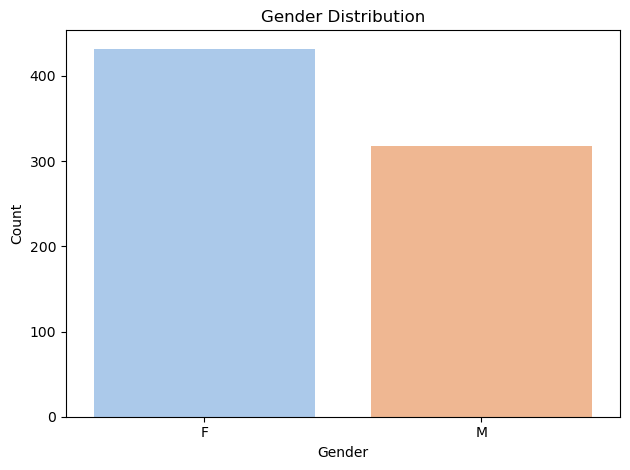

In [466]:
gender_counts = merged_df["GENDER"].value_counts().reset_index()
gender_counts.columns = ["GENDER", "Count"]

sns.barplot(x="GENDER", y="Count", data=gender_counts, palette="pastel")
plt.title("Gender Distribution")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.tight_layout()

plt.show()


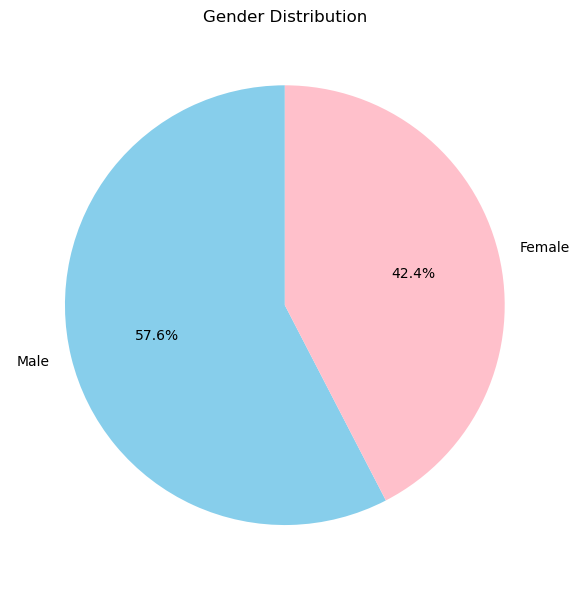

In [467]:
gender_counts = merged_df["GENDER"].value_counts()

plt.figure(figsize=(6, 6))
gender_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=["skyblue", "pink"], labels=["Male", "Female"])
plt.title("Gender Distribution")
plt.ylabel("") 
plt.tight_layout()

plt.show()


C:\Users\dell\AppData\Local\Temp\ipykernel_24880\939403786.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Label", y="Count", data=label_counts, palette="Set2")


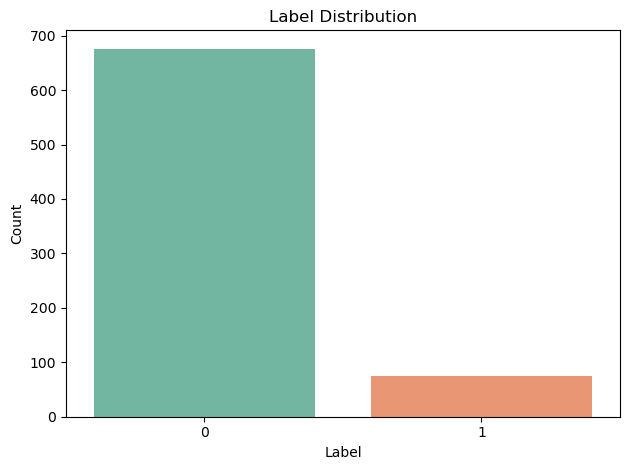

In [468]:
label_counts = merged_df["label"].value_counts().reset_index()
label_counts.columns = ["Label", "Count"]

sns.barplot(x="Label", y="Count", data=label_counts, palette="Set2")

plt.title("Label Distribution")
plt.xlabel("Label")
plt.ylabel("Count")
plt.tight_layout()

plt.show()


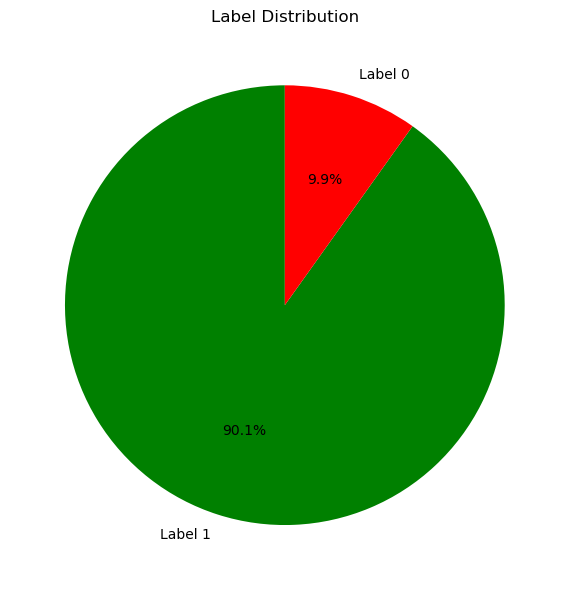

In [469]:
label_counts = merged_df["label"].value_counts()

plt.figure(figsize=(6, 6))
label_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=["green", "red"], labels=["Label 1", "Label 0"])

# Customize the plot
plt.title("Label Distribution")
plt.ylabel("") 
plt.tight_layout()

# Show the plot
plt.show()


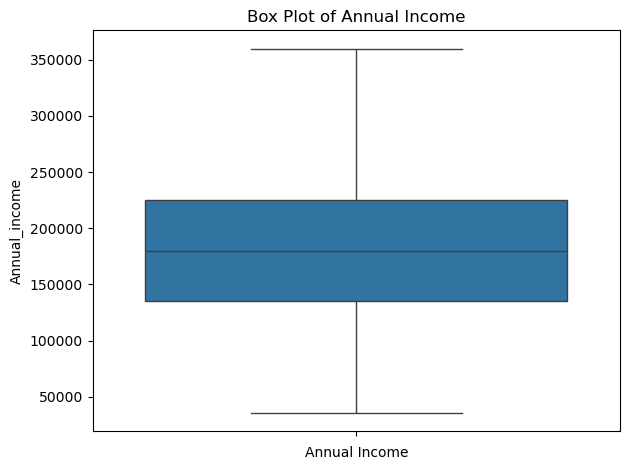

In [470]:
import seaborn as sns

sns.boxplot(y=merged_df["Annual_income"])

plt.title("Box Plot of Annual Income")
plt.xlabel("Annual Income")
plt.tight_layout()

plt.show()


In [471]:
X

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
15,5021310,M,N,Y,0,270000.0,Working,Secondary / secondary special,Married,House / apartment,-16896.0,-248,1,0,0,0,Laborers,2
16,5021314,M,N,Y,0,270000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-16896.0,-248,1,0,0,0,Laborers,2
17,5021430,F,N,Y,0,126000.0,Commercial associate,Higher education,Single / not married,House / apartment,-18907.0,-2470,1,0,0,0,Sales staff,1
18,5021431,F,N,Y,0,126000.0,Commercial associate,Higher education,Single / not married,House / apartment,-18907.0,-2470,1,0,0,0,Sales staff,1
20,5022053,M,N,N,0,202500.0,Working,Higher education,Single / not married,House / apartment,-12811.0,-4327,1,0,0,0,Laborers,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1535,5118268,M,Y,N,1,360000.0,State servant,Secondary / secondary special,Married,House / apartment,-11294.0,-3536,1,0,1,0,Drivers,3
1536,5028645,F,N,Y,0,292500.0,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2
1537,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1
1538,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4


C:\Users\dell\AppData\Local\Temp\ipykernel_24880\783525496.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette="coolwarm")


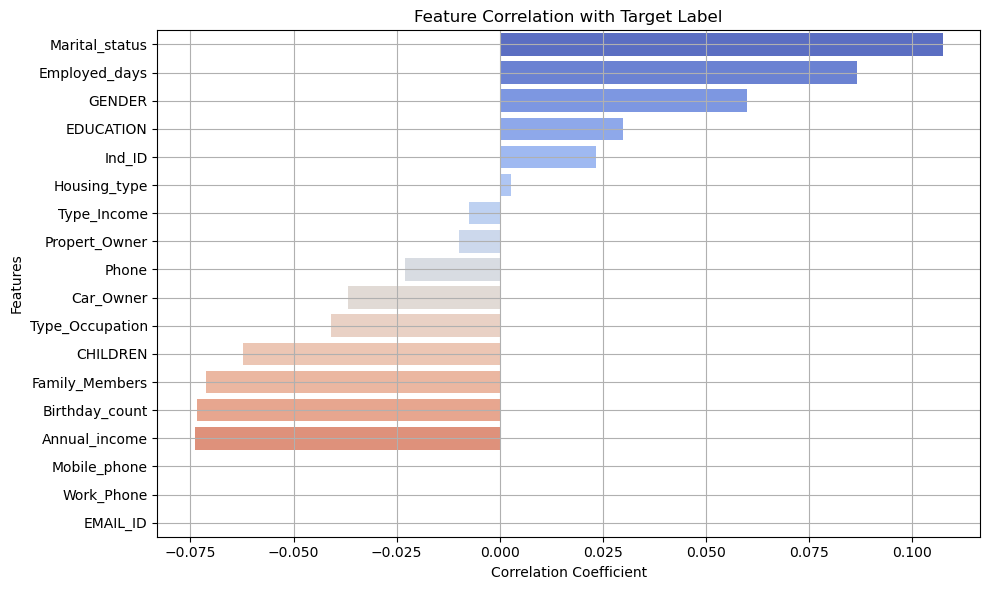

In [472]:
from sklearn.preprocessing import LabelEncoder

# Copy the original data before encoding
corr_df = merged_df.copy()

# Encode categorical columns
categorical_cols = ['GENDER', 'Car_Owner', 'Propert_Owner', 'Type_Income', 'EDUCATION',
                    'Marital_status', 'Housing_type', 'Type_Occupation']

le = LabelEncoder()
for col in categorical_cols:
    corr_df[col] = le.fit_transform(corr_df[col])

# Now compute correlation with target 'label'
correlations = corr_df.corr()['label'].drop('label').sort_values(ascending=False)

# Plot correlation
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette="coolwarm")
plt.title('Feature Correlation with Target Label')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.grid(True)
plt.tight_layout()
plt.show()


In [473]:
from sklearn.model_selection import train_test_split

# Split the balanced/resampled data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



print("Resampled class distribution:")
print(pd.Series(y_sampled).value_counts())


Resampled class distribution:
label
1    676
0    676
Name: count, dtype: int64


In [474]:
x_train_transformed = preprocessor.fit_transform(x_train)

x_test_transformed = preprocessor.transform(x_test)

smote = SMOTE(random_state=42, k_neighbors=1)
X_sampled, y_sampled = smote.fit_resample(x_train_transformed, y_train)

In [475]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import ShuffleSplit , cross_val_score
cv=ShuffleSplit(n_splits=5, test_size =0.2, random_state=42)
cross_val_score(LogisticRegression(),X_sampled,y_sampled,cv=cv).mean()

0.7064220183486238

In [476]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
models = {
    'SVC': SVC(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
}

In [477]:
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)


In [480]:
from sklearn.metrics import classification_report , confusion_matrix, accuracy_score
LR = LogisticRegression(C= 1, fit_intercept= True, l1_ratio = 0.1, penalty= 'l1', solver = 'saga')
LR.fit(x_train_transformed,y_train)
LR_pred = LR.predict(x_test_transformed)
accuracy_score(y_test,LR_pred)


c:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
c:\Users\dell\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.8866666666666667

In [481]:
svc_model = SVC()
svc_model.fit(x_train_transformed,y_train)
svc_model.score(x_test_transformed,y_test)

0.8866666666666667

In [482]:
rfc_model = RandomForestClassifier(random_state=42)
rfc_model.fit(x_train_transformed,y_train)
rfc_model.score(x_test_transformed,y_test)


0.9266666666666666

In [484]:
rfc_pred = rfc_model.predict(x_test_transformed)
rfc_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [485]:
svc_pred = svc_model.predict(x_test_transformed)


In [486]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_train_transformed,y_train)
KNN.score(x_test_transformed,y_test)


0.8933333333333333

In [487]:
KNN_pred = KNN.predict(x_test_transformed)


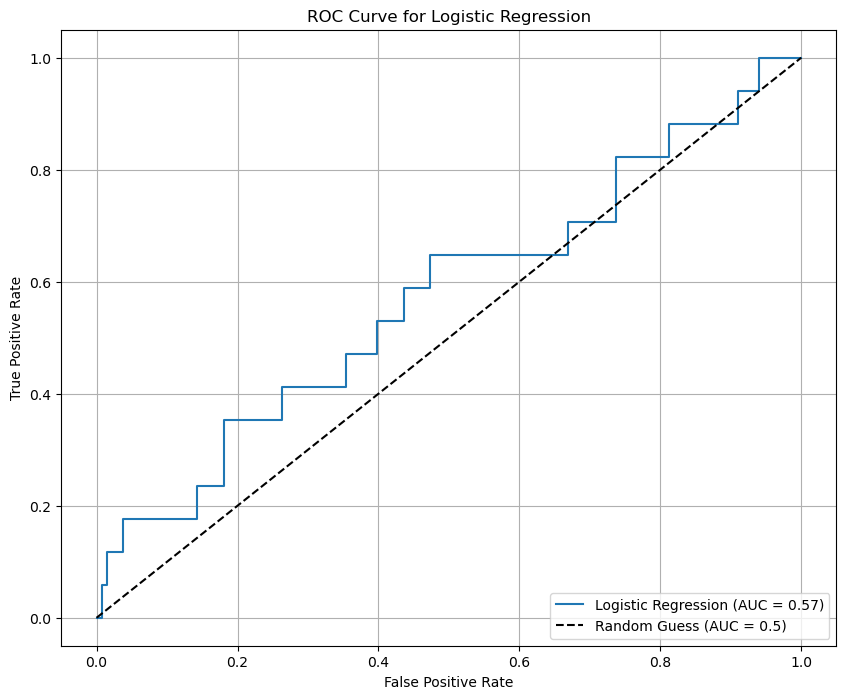

Overall ROC AUC for Logistic Regression: 0.5710


In [488]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
y_score = LR.predict_proba(x_test_transformed)[:, 1] 

fpr, tpr, _ = roc_curve(y_test, y_score) 
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f"Logistic Regression (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Logistic Regression")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Print the overall AUC
print(f"Overall ROC AUC for Logistic Regression: {roc_auc:.4f}")

c:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\dell\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


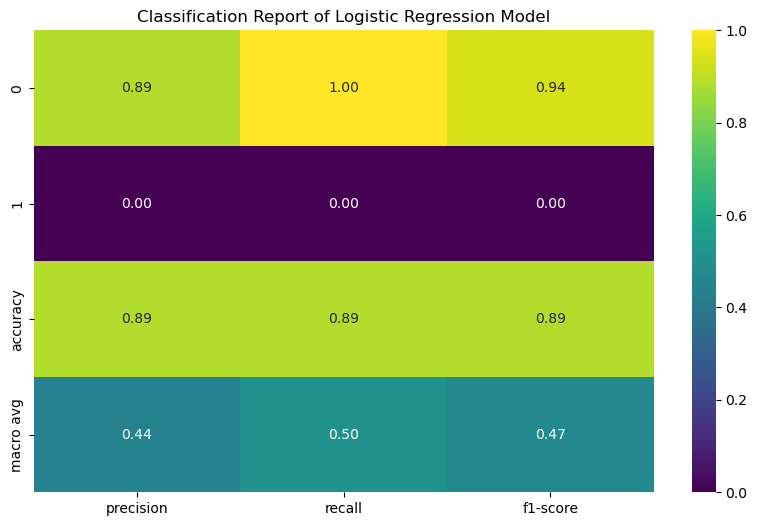

In [489]:
LR_report = classification_report(y_test, LR_pred, output_dict=True)
# Convert the classification report to a DataFrame
LR_report_df = pd.DataFrame(LR_report).transpose()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(LR_report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt=".2f")
plt.title("Classification Report of Logistic Regression Model")
plt.show()


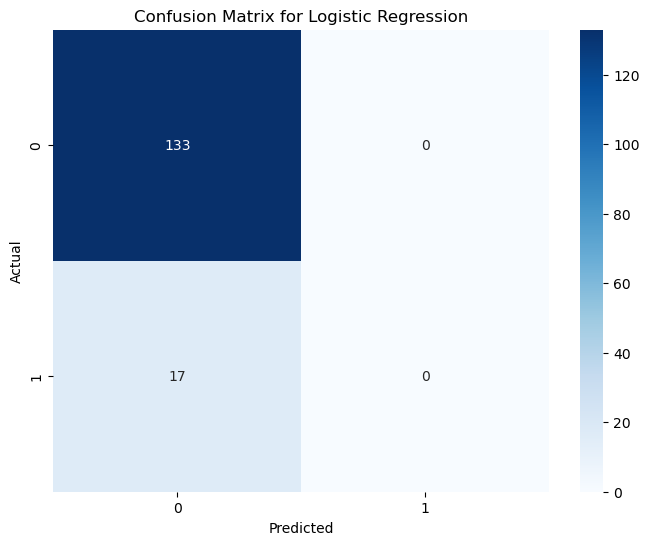

In [490]:
y_test_pred = LR.predict(x_test_transformed)
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

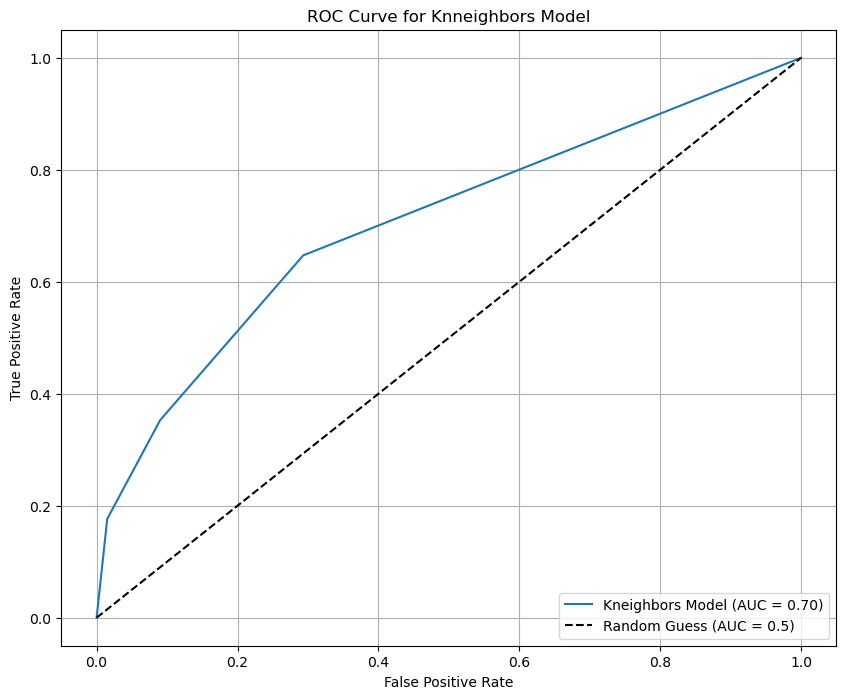

Overall ROC AUC for Kneighbors Model: 0.7048


In [492]:
y_score = KNN.predict_proba(x_test_transformed)[:, 1]  # Probabilities for the positive class (index 1)

# Compute the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_score)  # No need to binarize y_test for binary classification
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f"Kneighbors Model (AUC = {roc_auc:.2f})")

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Knneighbors Model")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Print the overall AUC
print(f"Overall ROC AUC for Kneighbors Model: {roc_auc:.4f}")


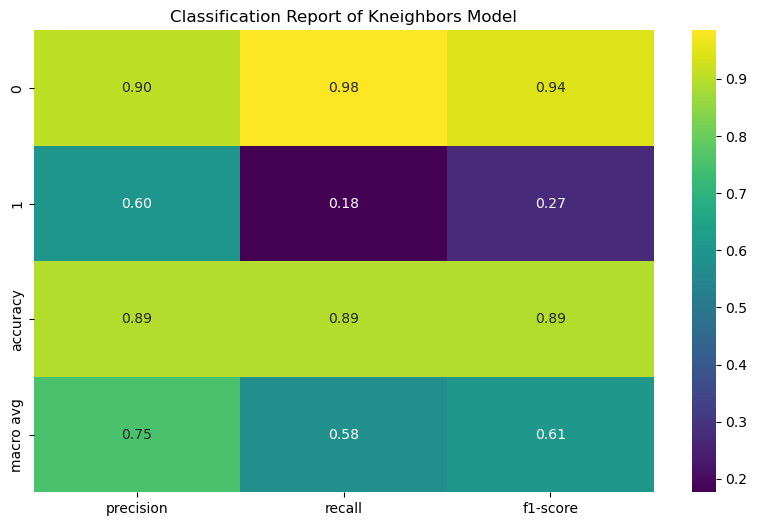

In [493]:
KN_report = classification_report(y_test, KNN_pred, output_dict=True)
# Convert the classification report to a DataFrame
KN_report_df = pd.DataFrame(KN_report).transpose()
plt.figure(figsize=(10, 6))
sns.heatmap(KN_report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt=".2f")
plt.title("Classification Report of Kneighbors Model")
plt.show()

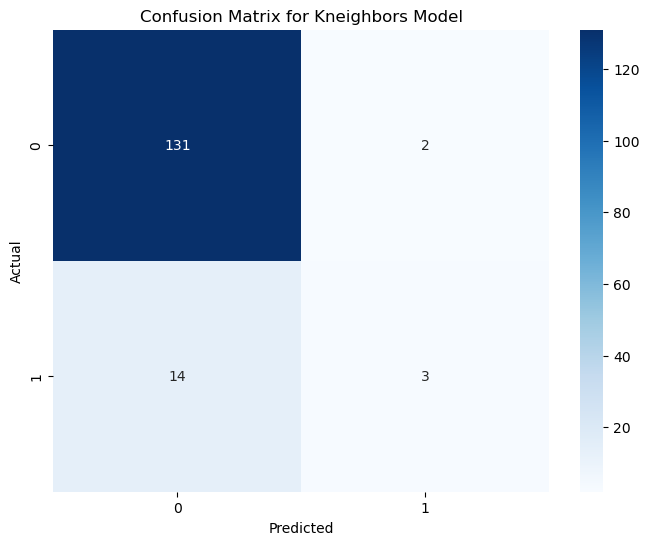

In [494]:
y_test_pred = KNN.predict(x_test_transformed)
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix for Kneighbors Model')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

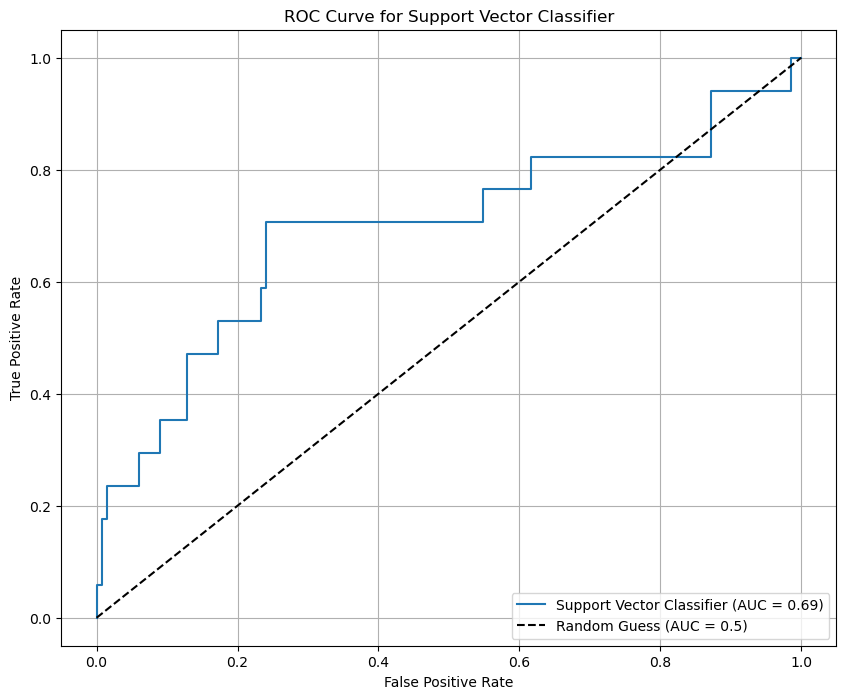

Overall ROC AUC for Support Vector Classifier Model: 0.6931


In [495]:
y_score = svc_model.decision_function(x_test_transformed)  # Decision function outputs for binary classification

# Compute the ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_score)  # No need to binarize y_test for binary classification
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f"Support Vector Classifier (AUC = {roc_auc:.2f})")

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Support Vector Classifier")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Print the overall AUC
print(f"Overall ROC AUC for Support Vector Classifier Model: {roc_auc:.4f}")


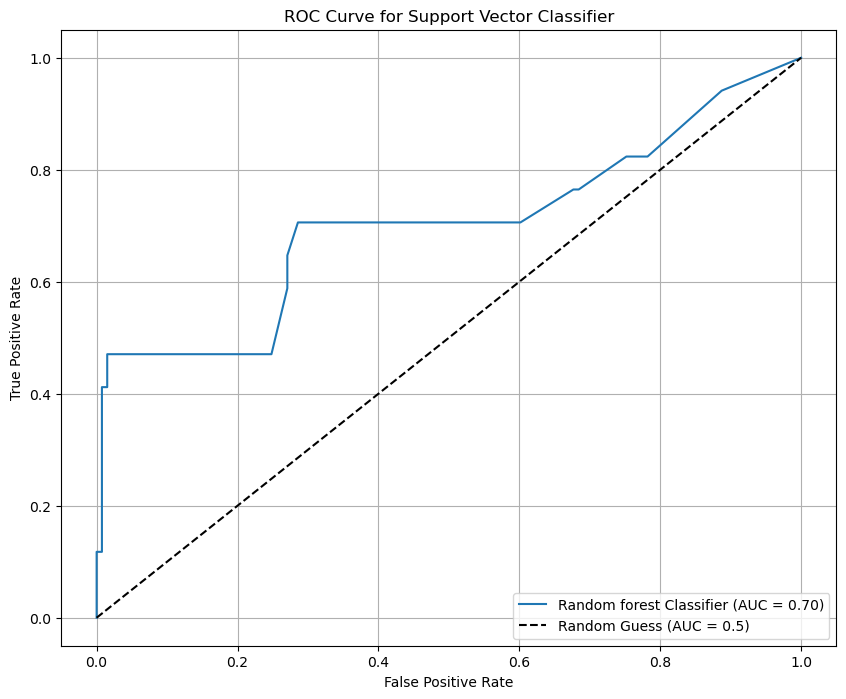

Overall ROC AUC for Random Forest Classifier Model: 0.7006


In [496]:
y_score = rfc_model.predict_proba(x_test_transformed)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_score)  # No need to binarize y_test for binary classification
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, label=f"Random forest Classifier (AUC = {roc_auc:.2f})")

# Plot diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Support Vector Classifier")
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Print the overall AUC
print(f"Overall ROC AUC for Random Forest Classifier Model: {roc_auc:.4f}")


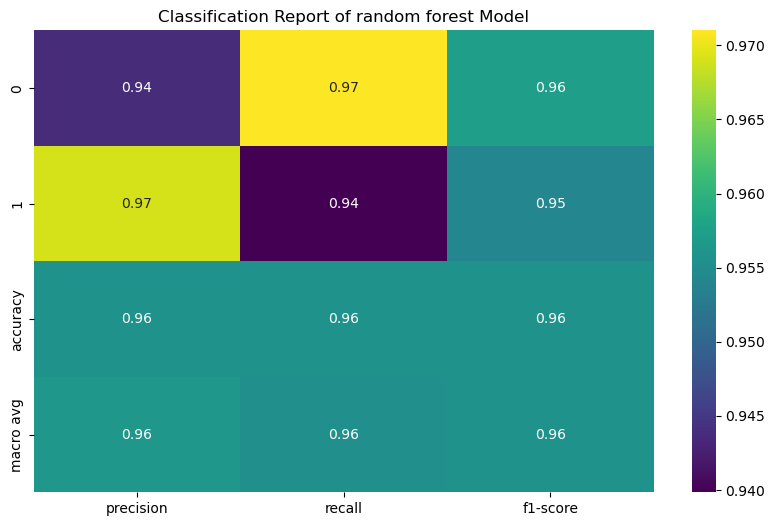

In [ ]:
rfc_report = classification_report(y_test, rfc_pred, output_dict=True)
rfc_report_df = pd.DataFrame(rfc_report).transpose()
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(rfc_report_df.iloc[:-1, :-1], annot=True, cmap='viridis', fmt=".2f")
plt.title("Classification Report of random forest Model")
plt.show()

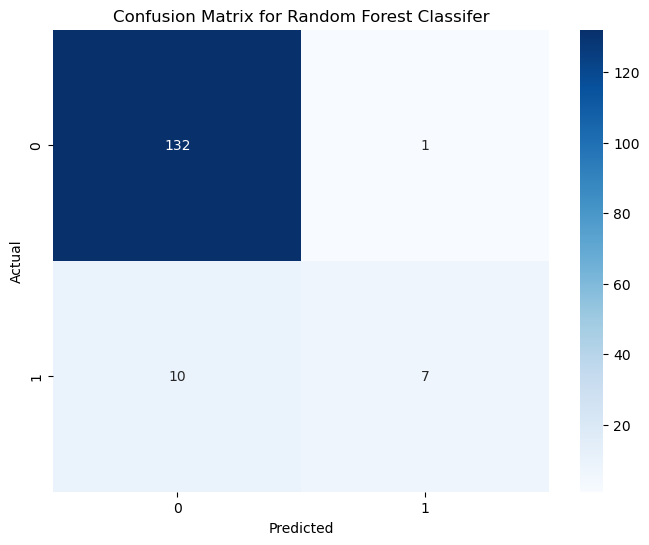

In [497]:
y_test_pred = rfc_model.predict(x_test_transformed)
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix for Random Forest Classifer")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_24880\2544385551.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")


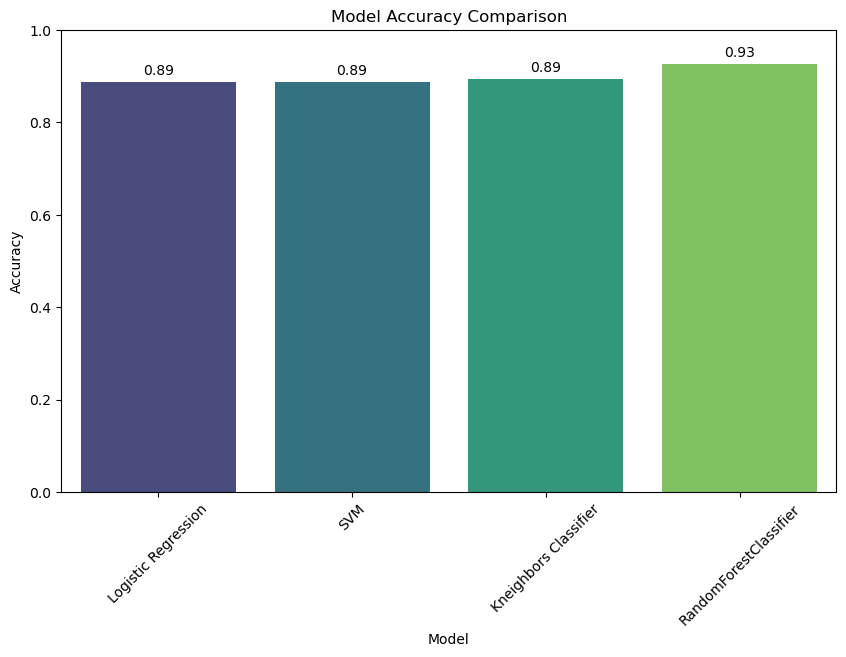

In [499]:
models = {
    'Logistic Regression': LR,
    'SVM': svc_model,
    'Kneighbors Classifier': KNN,
    "RandomForestClassifier": rfc_model

}

accuracies = {}

for model_name, model in models.items():
    y_test_pred = model.predict(x_test_transformed)
    accuracy = accuracy_score(y_test, y_test_pred)
    accuracies[model_name] = accuracy

plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")

for i, (model_name, accuracy) in enumerate(accuracies.items()):
    plt.text(i, accuracy + 0.01, f"{accuracy:.2f}", ha='center', va='bottom', fontsize=10)

plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.show()

In [501]:
x_train_transformed[0]

array([-0.65581133, -0.7060329 ,  0.9751454 ,  0.        ,  0.        ,
       -0.49217479,  0.        , -1.37367026,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ])

In [ ]:
import nbformat
import os

def convert_ipynb_to_py(ipynb_filename):
    if not ipynb_filename.endswith(".ipynb"):
        print("Error: Please provide a valid .ipynb file.")
        return
    
    py_filename = os.path.splitext(ipynb_filename)[0] + ".py"
    
    try:
        with open(ipynb_filename, 'r', encoding='utf-8') as f:
            notebook = nbformat.read(f, as_version=4)
        
        with open(py_filename, 'w', encoding='utf-8') as f:
            for cell in notebook.cells:
                if cell.cell_type == "code":
                    f.write("\n".join(cell.source.splitlines()) + "\n\n")
        
        print(f"Successfully converted {ipynb_filename} to {py_filename}")
    except Exception as e:
        print(f"Error: {e}")

if __name__ == "__main__":
    filename = input("Enter the Jupyter Notebook filename (with .ipynb extension): ")
    convert_ipynb_to_py(filename)


Successfully converted creditApprovalModel.ipynb to creditApprovalModel.py


In [ ]:
# Assuming x_test is a numpy array and y_test is a pandas Series
single_sample = x_test[10].reshape(1, -1)  # Reshape it to (1, n_features)

# Now you can make the prediction
prediction = svc_model.predict(single_sample)

# Get the true label for comparison using .iloc[] (position-based indexing)
y_sample = y_test.iloc[10]  # Access the 100th sample in y_test

# Print the prediction and the true label
print(f"Prediction: {prediction}")
print(f"True label: {y_sample}")


Prediction: [0]
True label: 0


In [503]:
new_data = pd.DataFrame({
    'GENDER': ['M'], 'Car_Owner': ['Yes'], 'Propert_Owner': ['No'], 'Type_Income': ['Salary'],
    'EDUCATION': ['Master'], 'Marital_status': ['Single'], 'Housing_type': ['Rent'], 'Type_Occupation': ['Engineer'],
    'CHILDREN': [2], 'Annual_income': [50000], 'Employed_days': [200], 'Mobile_phone': [1], 'Work_Phone': [1],
    'Phone': [0], 'EMAIL_ID': [1], 'Family_Members': [4]
})

# Apply the same transformations to the new data
new_data_transformed = preprocessor.transform(new_data)

NotFittedError: This ColumnTransformer instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# import joblib

# # Save the model
# joblib.dump(rfc_model, "credit_model.pkl")

# # Save your preprocessor (ColumnTransformer)
# joblib.dump(preprocessor, "preprocessor.pkl")


In [ ]:
# import joblib

# # Load the model and preprocessor from the .pkl files
# model = joblib.load('credit_model.pkl')
# preprocessor = joblib.load('preprocessor.pkl')

# # Check what is in the model and preprocessor
# print("Model:", model)
# print("Preprocessor:", preprocessor)


In [ ]:
# from fastapi import FastAPI
# from pydantic import BaseModel
# import joblib
# import pandas as pd
# import uvicorn

# # Load model and preprocessor
# model = joblib.load("credit_model.pkl")
# preprocessor = joblib.load("preprocessor.pkl")

# app = FastAPI()

# # Define input format
# class CreditInput(BaseModel):
#     GENDER: str
#     Car_Owner: str
#     Propert_Owner: str
#     CHILDREN: int
#     Annual_income: float
#     Type_Income: str
#     EDUCATION: str
#     Marital_status: str
#     Housing_type: str
#     Employed_days: int
#     Mobile_phone: int
#     Work_Phone: int
#     Phone: int
#     EMAIL_ID: int
#     Type_Occupation: str
#     Family_Members: int

# @app.post("/predict")
# def predict_credit_status(data: CreditInput):
#     input_data = data.dict()

#     # Convert input to DataFrame
#     df = pd.DataFrame([input_data])

#     # Preprocess the input
#     processed_input = preprocessor.transform(df)

#     # Predict
#     prediction = model.predict(processed_input)[0]

#     # Return the prediction result
#     return {
#         "Predicted_Label": int(prediction),
#         "Prediction": "Approved" if prediction == 1 else "Rejected"
#     }

# if __name__ == "__main__":
#     import nest_asyncio
#     nest_asyncio.apply()
#     uvicorn.run(app, host="0.0.0.0", port=8002)
